In [1]:
import pandas as pd
import numpy as np
import missingno


Bad key "text.kerning_factor" on line 4 in
C:\Users\USER\.conda\envs\py_373\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\USER\.conda\envs\py_373\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
xls = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
df_Transactions = pd.read_excel(xls, 'Transactions',skiprows=1)
df_NewCustomerList = pd.read_excel(xls, 'NewCustomerList')
df_CustomerDemographic = pd.read_excel(xls, 'CustomerDemographic')
df_CustomerAddress = pd.read_excel(xls, 'CustomerAddress')

In [3]:
df_Transactions.shape

(20000, 13)

In [4]:
df_Transactions.isnull().sum()/df_Transactions.shape[0]*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

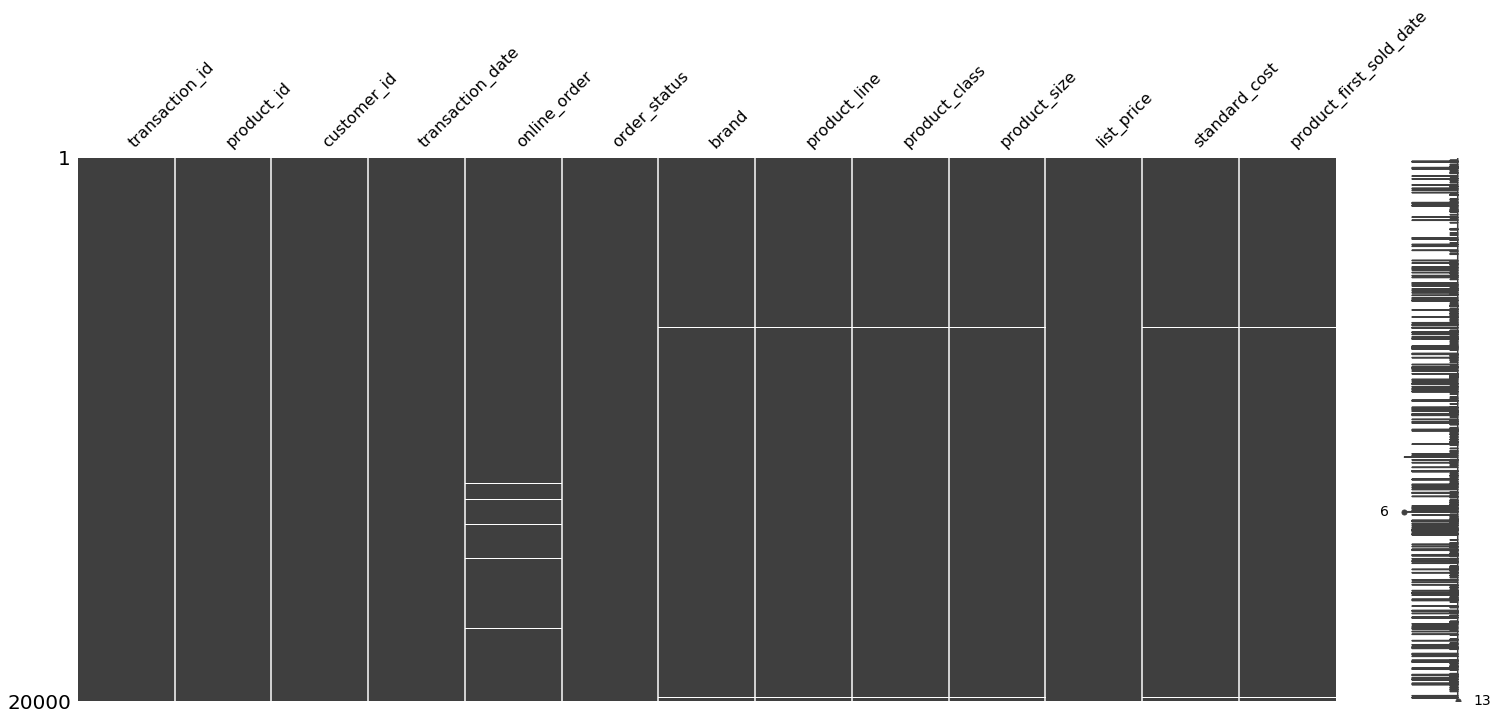

In [5]:
missingno.matrix(df_Transactions)

So, we see from the above plot that there's no relationship between missing values in the online_order column with product_line/product_class etc.

Since the missing values are very less <2% we can safely remove transaction with missing values

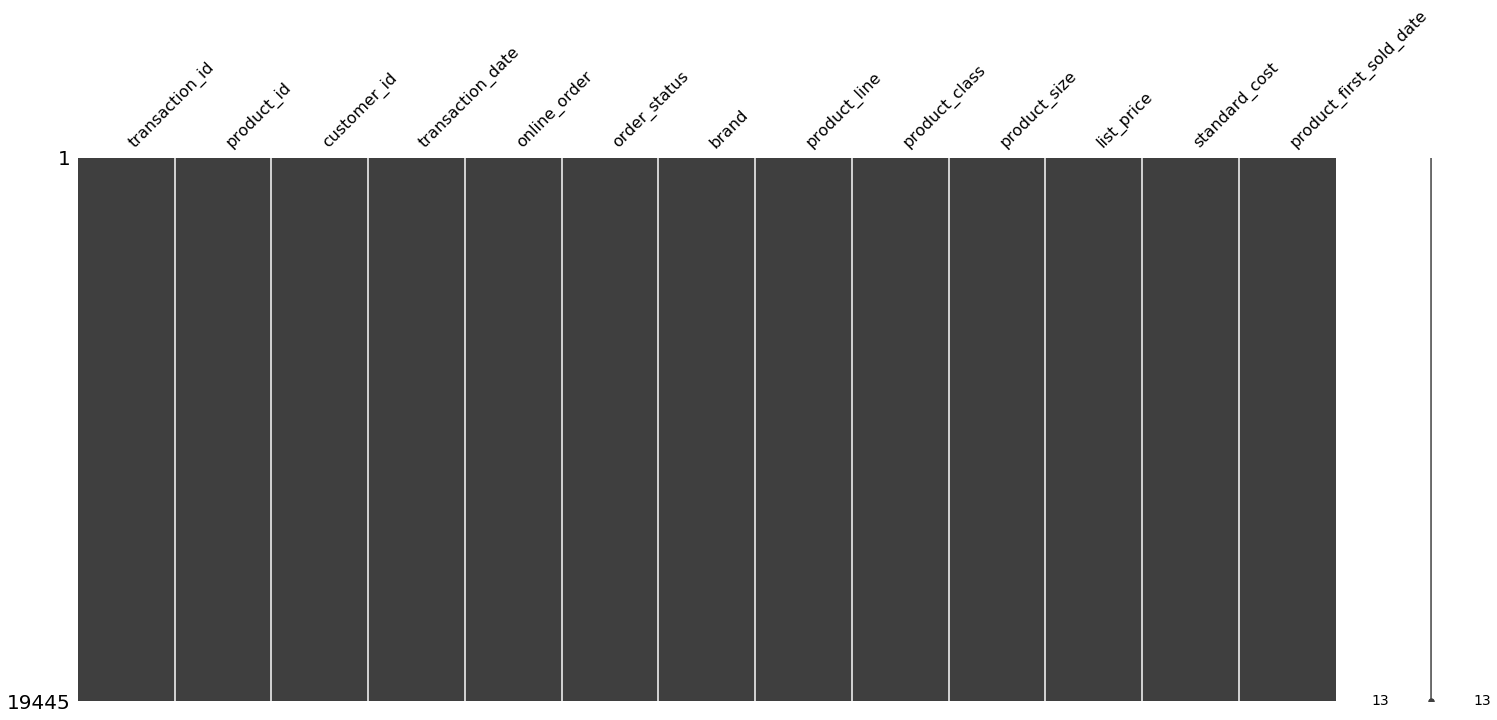

In [6]:
df_Transactions.dropna(axis = 0, inplace=True)
missingno.matrix(df_Transactions)

In [11]:
writer = pd.ExcelWriter('Cleaned Data.xlsx', engine='xlsxwriter')
df_Transactions.to_excel(excel_writer=writer,sheet_name= "Transactions", index=False)
writer.save()